In [1]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

2024-11-20 13:50:19.818826: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 13:50:19.913071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732078219.952846    3821 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732078219.964912    3821 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 13:50:20.050360: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Dataset Directory
# Load image paths
DATA_DIR = os.path.join("/home/user/Desktop", "CNN_Breast_Cancer", "Histopathology", "IDC_regular_ps50_idx5", "**", "*.png")
breast_imgs = glob.glob(DATA_DIR, recursive=True)


In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)

/home/user/Desktop/CNN_Breast_Cancer/Histopathology/IDC_regular_ps50_idx5/9175/0/9175_idx5_x3701_y501_class0.png
/home/user/Desktop/CNN_Breast_Cancer/Histopathology/IDC_regular_ps50_idx5/9175/0/9175_idx5_x3901_y851_class0.png
/home/user/Desktop/CNN_Breast_Cancer/Histopathology/IDC_regular_ps50_idx5/9175/0/9175_idx5_x201_y301_class0.png
/home/user/Desktop/CNN_Breast_Cancer/Histopathology/IDC_regular_ps50_idx5/9175/0/9175_idx5_x1901_y151_class0.png
/home/user/Desktop/CNN_Breast_Cancer/Histopathology/IDC_regular_ps50_idx5/9175/0/9175_idx5_x1951_y501_class0.png


In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0' :
        non_cancer_imgs.append(img)
    
    elif img[-5] == '1' :
        cancer_imgs.append(img)

In [5]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


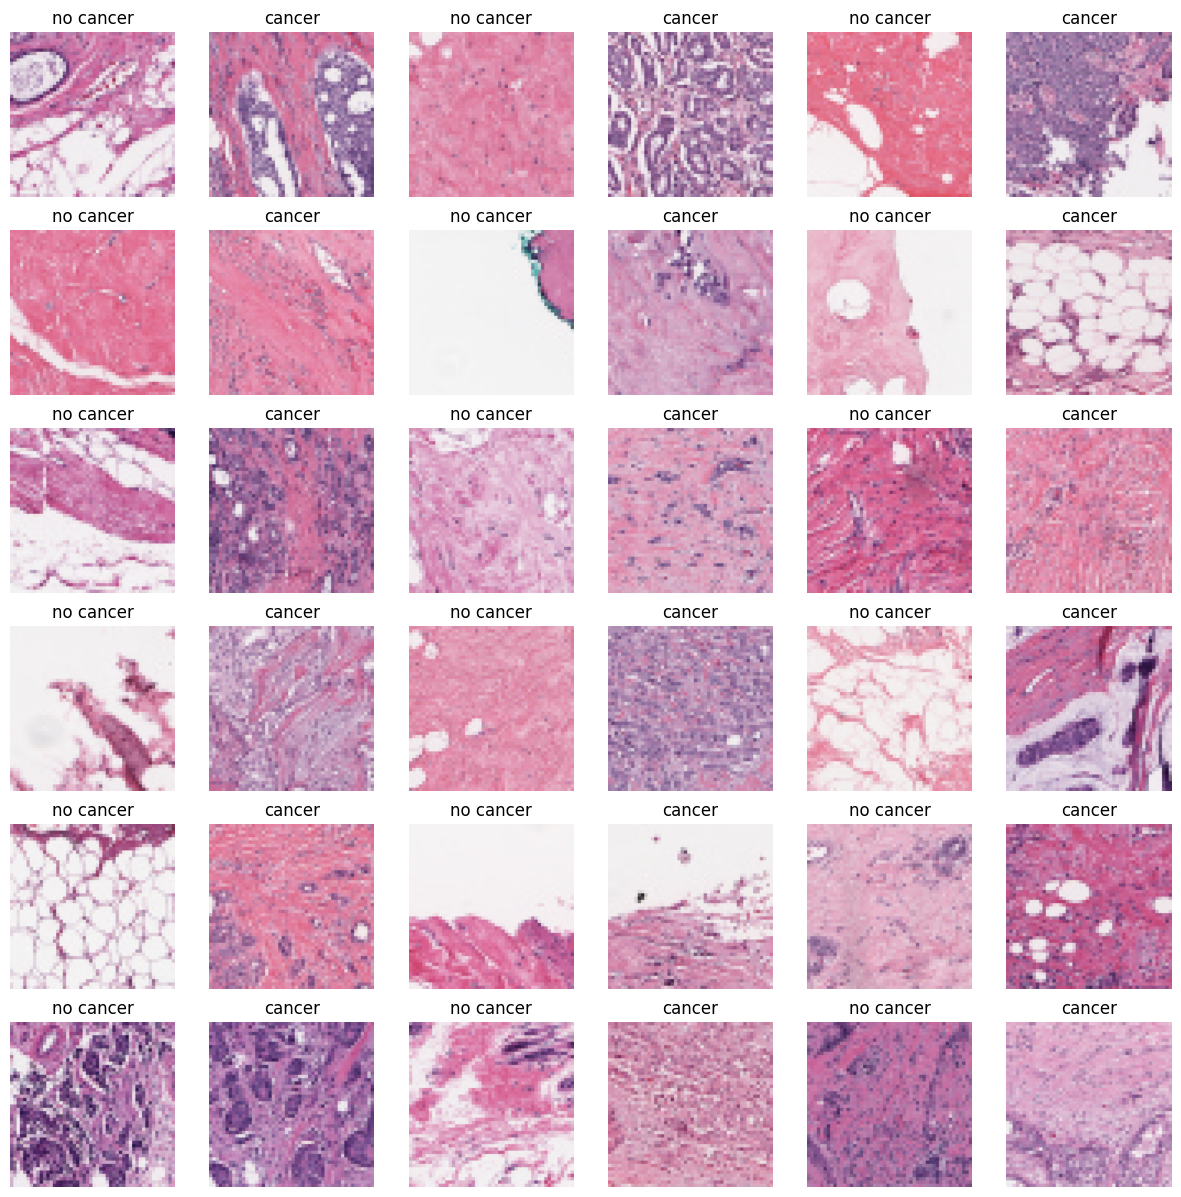

In [6]:
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_cancer_imgs), 18)
some_can = np.random.randint(0, len(cancer_imgs), 18)

# Loading and preparing images for visualization

s = 0
for num in some_non:
    img = image.load_img(non_cancer_imgs[num], target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2 * s + 1)
    plt.axis('off')
    plt.title('no cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_can:
    img = image.load_img(cancer_imgs[num], target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2 * s)
    plt.axis('off')
    plt.title('cancer')
    plt.imshow(img.astype('uint8'))
    s += 1



In [7]:

import numpy as np
import random
import cv2

# Assuming non_cancer_imgs and cancer_imgs are already defined lists of image file paths

# Initialize empty arrays to store image data and labels
non_img_arr = []  # Array for non-cancer images
can_img_arr = []  # Array for cancer images

# Randomly sample images from 'non_cancer_imgs' and 'cancer_imgs'
some_non_img = random.sample(non_cancer_imgs, len(non_cancer_imgs))
some_can_img = random.sample(cancer_imgs, len(cancer_imgs))

# Process non-cancer images
for img in some_non_img:
    # Read the image in color mode
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label (0 for non-cancer) as a tuple
    non_img_arr.append((n_img_size, 0))

# Process cancer images
for img in some_can_img:
    # Read the image in color mode
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # Resize the image to a fixed size (50x50 pixels)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # Append the resized image and label (1 for cancer) as a tuple
    can_img_arr.append((c_img_size, 1))

# Combine the non-cancer and cancer image arrays
breast_img_arr = non_img_arr + can_img_arr  # This avoids the concatenation error

# Shuffle the combined image array
random.shuffle(breast_img_arr)

# Initialize separate lists for image data and labels
X = []
y = []

# Extract features and labels from the shuffled array
for feature, label in breast_img_arr:
    X.append(feature)  # Append the image data (features)
    y.append(label)    # Append the label

# Convert the lists 'X' and 'y' to NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the image data array
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))


X shape: (277524, 50, 50, 3)
y shape: (277524,)


In [8]:
# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

# Define a rate (percentage) for subsampling the training data
rate = 0.5

# Calculate the number of samples to keep in the training data based on the rate
num = int(X.shape[0] * rate)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
y_train = to_categorical(y_train, 2)  # Assuming there are 2 classes (non-cancer and cancer)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('X_val shape : {}' .format(X_val.shape))
print('y_val shape : {}' .format(y_val.shape))

X_train shape : (222019, 50, 50, 3)
X_test shape : (27753, 50, 50, 3)
y_train shape : (222019, 2)
y_test shape : (27753, 2)
X_val shape : (27752, 50, 50, 3)
y_val shape : (27752, 2)


In [9]:
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of monitored quantity
)

# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=2,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,       # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=0,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, Reshape, Dense, Dropout, LayerNormalization, 
    Embedding, MultiHeadAttention, Add, Concatenate, GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0

# Configuration dictionary
config = {
    "num_layers": 6,
    "hidden_dim": 64,
    "mlp_dim": 128,
    "num_heads": 2,
    "dropout_rate": 0.1,
    "image_size": 50,  # Resized to 224x224 to suit EfficientNetB0
    "patch_size": 5,   # Adjusted to fit 224x224 image size
    "num_channels": 3,
    "num_classes": 2,
    "trainable_backbone": False
}

# Class token for Vision Transformer
class ClassToken(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_uniform_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 1, input_shape[-1]), dtype="float32"),
            trainable=True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]
        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

# Transformer Encoder
def transformer_encoder(x, cf):
    skip_1 = x
    x = LayerNormalization()(x)
    x = MultiHeadAttention(
        num_heads=cf["num_heads"], key_dim=cf["hidden_dim"]
    )(x, x)
    x = Add()([x, skip_1])

    skip_2 = x
    x = LayerNormalization()(x)
    x = mlp(x, cf)
    x = Add()([x, skip_2])
    return x

# MLP block
def mlp(x, cf):
    x = Dense(cf["mlp_dim"], activation="gelu")(x)
    x = Dropout(cf["dropout_rate"])(x)
    x = Dense(cf["hidden_dim"])(x)
    x = Dropout(cf["dropout_rate"])(x)
    return x

# Vision Transformer model with EfficientNetB0 as backbone
def CNNViT(cf):
    # Input layer resized to 224x224
    inputs = Input((cf["image_size"], cf["image_size"], cf["num_channels"]))

    # Load pre-trained EfficientNetB0 model
    cnn = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=inputs)

    # Optionally make CNN layers trainable
    for layer in cnn.layers:
        layer.trainable = cf["trainable_backbone"]

    # Extract output from the CNN backbone
    output = cnn.output
    output = GlobalAveragePooling2D()(output)  # Pooling for feature reduction

    # Patch embedding
    patch_embed = Conv2D(cf["hidden_dim"], kernel_size=cf["patch_size"], strides=cf["patch_size"], padding="same")(inputs)
    _, h, w, f = patch_embed.shape
    patch_embed = Reshape((h * w, f))(patch_embed)

    # Positional embedding
    positions = tf.range(start=0, limit=h * w, delta=1)
    pos_embed = Embedding(input_dim=h * w, output_dim=cf["hidden_dim"])(positions)
    embed = patch_embed + pos_embed

    # Add the class token for transformer processing
    token = ClassToken()(embed)
    x = Concatenate(axis=1)([token, embed])

    # Apply transformer encoders
    for _ in range(cf["num_layers"]):
        x = transformer_encoder(x, cf)

    # Layer normalization before classification
    x = LayerNormalization()(x)
    x = x[:, 0, :]  # Use the output from the class token
    x = Dense(cf["num_classes"], activation="softmax")(x)

    # Create model
    model = Model(inputs, x)
    return model

# Build the model with resized input
model = CNNViT(config)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



I0000 00:00:1732078268.694062    3821 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22446 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4e:00.0, compute capability: 8.6
I0000 00:00:1732078268.694462    3821 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22446 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:85:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50, 50, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 10, 10,    │      4,864 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 100, 64)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 100, 64)   │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_token         │ (None, 1, 64)     │          0 │ add[0][0]         │
│ (ClassToken)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 101, 64)   │          0 │ class_token[0][0… │
│ (Concatenate)       │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 101, 64)   │        128 │ concatenate[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 101, 64)   │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 101, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 101, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 101, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 101, 128)  │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 101, 64)   │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 101, 64)   │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 101, 64)   │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 101, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 101, 64)   │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 101, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 101, 64)   │        128 │ add_3[0][0]     

 Total params: 305,410 (1.17 MB)

 Trainable params: 305,410 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs = 50,
                    batch_size = 16,
                    callbacks=[early_stopping, plateau])


Epoch 1/50


I0000 00:00:1732078278.550307    4009 service.cc:148] XLA service 0x7effe40037f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732078278.550407    4009 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1732078278.550411    4009 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-11-20 13:51:18.763749: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732078279.633962    4009 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-20 13:51:21.005234: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 56 bytes spill stores, 56 bytes spill loads

2024-11-20 13:51:21.082374: I external/local_xla/xla/stream_executor

   50/13877 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.6406 - loss: 0.7043 

I0000 00:00:1732078291.151729    4009 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13873/13877 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.4076

2024-11-20 13:52:25.214458: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 48 bytes spill stores, 48 bytes spill loads

2024-11-20 13:52:25.344852: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 136 bytes spill stores, 136 bytes spill loads

2024-11-20 13:52:25.415641: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 56 bytes spill stores, 56 bytes spill loads

2024-11-20 13:52:25.762042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 56 bytes spill stores, 56 bytes spill loads



13877/13877 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.4076

2024-11-20 13:52:33.049428: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 80 bytes spill stores, 80 bytes spill loads

2024-11-20 13:52:33.089956: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 72 bytes spill stores, 72 bytes spill loads

2024-11-20 13:52:33.273824: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 28 bytes spill stores, 28 bytes spill loads

2024-11-20 13:52:33.277735: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 248 bytes spill stores, 248 bytes spill loads

2024-11-20 13:52:33.473795: I external/local_xla/xla/stream_executor

13877/13877 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.8195 - loss: 0.4076 - val_accuracy: 0.8574 - val_loss: 0.3298 - learning_rate: 1.0000e-04
Epoch 2/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - accuracy: 0.8572 - loss: 0.3326 - val_accuracy: 0.8663 - val_loss: 0.3142 - learning_rate: 1.0000e-04
Epoch 3/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.8648 - loss: 0.3165 - val_accuracy: 0.8668 - val_loss: 0.3097 - learning_rate: 1.0000e-04
Epoch 4/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - accuracy: 0.8675 - loss: 0.3100 - val_accuracy: 0.8693 - val_loss: 0.3035 - learning_rate: 1.0000e-04
Epoch 5/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.8699 - loss: 0.3052 - val_accuracy: 0.8651 - val_loss: 0.3101 - learning_rate: 1.0000e-04
Epoch 6/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - accuracy: 0.8735 - loss: 0.2984 - val_accuracy: 0.8766 - val_loss: 0.2923 - learning_rate: 1.0000e-04
Epoch 7/50
13877/13877 ━━━━━━━━━━━━━━━━━━━━ 7

In [12]:
#use the train and val set in the model.fit()
model.evaluate(X_test, y_test) # use the test set here

868/868 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8912 - loss: 0.2605


[0.25430363416671753, 0.8934890031814575]

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming Y_pred and Y_true are already defined
# Y_pred is the output from model.predict, Y_pred_classes is obtained by np.argmax(Y_pred, axis=1)
y_pred = model.predict(X_test)
Y_true = np.argmax(y_test, axis=1)  # Make sure y_test is correctly prepared
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate Precision, Recall, and F1 Score
precision = precision_score(Y_true, y_pred_classes)
recall = recall_score(Y_true, y_pred_classes)
f1 = f1_score(Y_true, y_pred_classes)

# Calculate the probabilities for the positive class
Y_pred_probs = y_pred[:, 1]  # assuming your model outputs probabilities for each class

# ROC AUC Score
roc_auc = roc_auc_score(Y_true, Y_pred_probs)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.83
Recall: 0.79
F1 Score: 0.81
ROC AUC Score: 0.95


868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


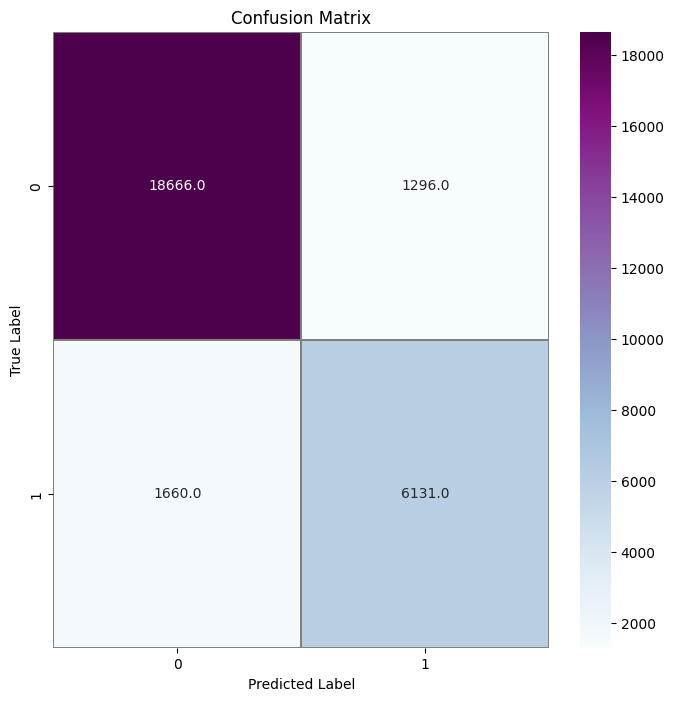

In [17]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

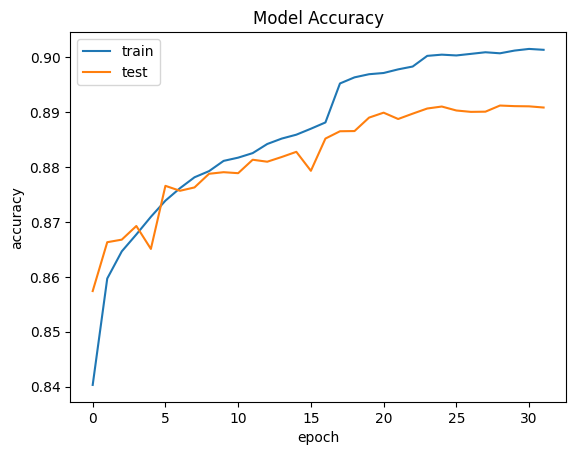

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

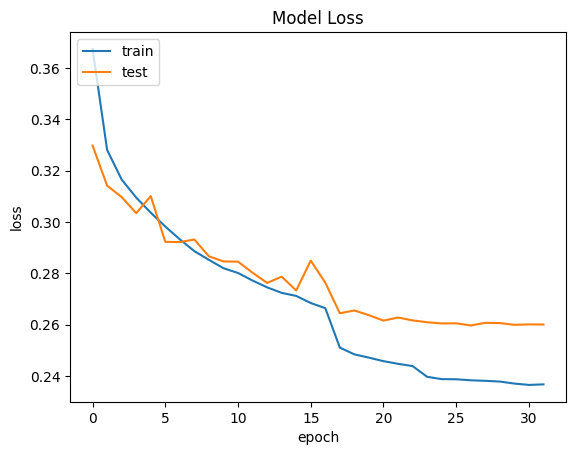

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#using test set here your model will be biased because you have used it during training, 
#dont use the test set during the training of your model.
# You should always split to train, val and test sets. 
# train and val for training and test set for evaluation.
prediction = model.predict(X_test)
prediction

868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[4.2822716e-01, 5.7177281e-01],
       [1.6940349e-04, 9.9983060e-01],
       [9.9111676e-01, 8.8832881e-03],
       ...,
       [3.6917038e-05, 9.9996305e-01],
       [9.9999726e-01, 2.7606989e-06],
       [9.9892265e-01, 1.0773025e-03]], dtype=float32)

2024-11-20 14:42:55.612155: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_50', 136 bytes spill stores, 136 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Diagnosis: Non-Cancerous
Calcification Type: No Calcification
True Diagnosis: Non-Cancerous


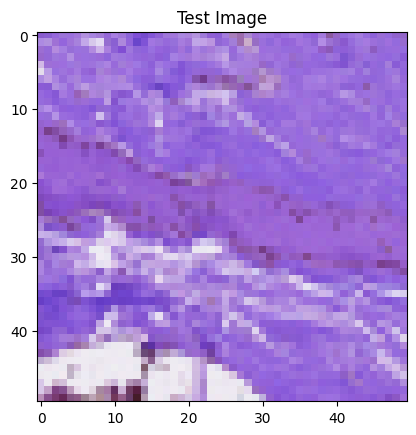

In [21]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}

# Define a function for plotting an image from an array
def img_plot(arr, index=0):
    # Set the title for the plot
    plt.title('Test Image')
    
    # Display the image at the specified index in the array
    plt.imshow(arr[index])

# Set the index value to 90
index = 90

# Plot an image from the X_test array using the img_plot function
img_plot(X_test, index)

# Extract a single image from X_test based on the specified index
input = X_test[index:index+1]

# Make a prediction using the CNN model and get the class with the highest probability
predicted_class_index = model.predict(input)[0].argmax()

# Get the true label from the y_test array
true_class_index = y_test[index].argmax()

# Get the predicted and true labels
predicted_label = class_labels[predicted_class_index]
true_label = class_labels[true_class_index]

# Get the calcification type based on the predicted class index (modify as needed)
calcification_type = calcification_types[predicted_class_index]

# Print the prediction result with calcification type
print('Predicted Diagnosis:', predicted_label)
print('Calcification Type:', calcification_type)
print('True Diagnosis:', true_label)

In [ ]:
# model.save('RESNET50+VITCNN_model.h5')